# 🌳 Notebook 07: Ensemble Methods
## Intelligent Agriculture - Crop Recommendation System

**Objectives:**
1. Implement Random Forest (Bagging)
2. Implement Gradient Boosting
3. Implement AdaBoost
4. Implement XGBoost
5. Compare ensemble methods performance
6. Feature importance analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

# Check if XGBoost is available
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("✅ XGBoost is available")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("⚠️  XGBoost not installed. Install with: pip install xgboost")
    print("   XGBoost sections will be skipped.")


✅ Libraries imported successfully!
✅ XGBoost is available


In [2]:
# Load preprocessed data
train_data = pd.read_csv('../data/processed/train.csv')
val_data = pd.read_csv('../data/processed/validation.csv')
test_data = pd.read_csv('../data/processed/test.csv')
scaler = joblib.load('../data/processed/scaler.pkl')
label_encoder = joblib.load('../data/processed/label_encoder.pkl')

print(f"✅ Data loaded: {len(train_data)} train, {len(val_data)} val, {len(test_data)} test")

# Prepare features and targets
feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X_train = train_data[feature_cols]
X_val = val_data[feature_cols]
X_test = test_data[feature_cols]
y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

# Scale features (important for some ensemble methods)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

target_names = label_encoder.classes_
print(f"Number of classes: {len(target_names)}")
print(f"Feature columns: {feature_cols}")

✅ Data loaded: 1540 train, 330 val, 330 test
Number of classes: 22
Feature columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [3]:
# Random Forest Implementation
print("🌲 RANDOM FOREST CLASSIFIER")
print("=" * 50)

start_time = time.time()
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)  # FIX: Use scaled data
training_time_rf = time.time() - start_time

# Predictions
y_val_pred_rf = rf_model.predict(X_val_scaled)  # FIX: Use scaled data
y_val_proba_rf = rf_model.predict_proba(X_val_scaled)  # FIX: Use scaled data

# Metrics
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf, average='weighted')
recall_rf = recall_score(y_val, y_val_pred_rf, average='weighted')
f1_rf = f1_score(y_val, y_val_pred_rf, average='weighted')

print(f"Training time: {training_time_rf:.2f} seconds")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Number of trees: {rf_model.n_estimators}")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Important Features (Random Forest):")
print(feature_importance_rf.head())

🌲 RANDOM FOREST CLASSIFIER
Training time: 0.26 seconds
Accuracy: 0.9970
Precision: 0.9972
Recall: 0.9970
F1-Score: 0.9970
Number of trees: 100

Top 5 Important Features (Random Forest):
    Feature  Importance
6  rainfall    0.234365
4  humidity    0.208780
2         K    0.168565
1         P    0.148198
0         N    0.113355


In [4]:
# Gradient Boosting Implementation
print("\n📈 GRADIENT BOOSTING CLASSIFIER")
print("=" * 50)

start_time = time.time()
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)  # FIX: Use scaled data
training_time_gb = time.time() - start_time

# Predictions
y_val_pred_gb = gb_model.predict(X_val_scaled)  # FIX: Use scaled data
y_val_proba_gb = gb_model.predict_proba(X_val_scaled)  # FIX: Use scaled data

# Metrics
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
precision_gb = precision_score(y_val, y_val_pred_gb, average='weighted')
recall_gb = recall_score(y_val, y_val_pred_gb, average='weighted')
f1_gb = f1_score(y_val, y_val_pred_gb, average='weighted')

print(f"Training time: {training_time_gb:.2f} seconds")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")

# Feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Important Features (Gradient Boosting):")
print(feature_importance_gb.head())


📈 GRADIENT BOOSTING CLASSIFIER
Training time: 19.29 seconds
Accuracy: 0.9818
Precision: 0.9836
Recall: 0.9818
F1-Score: 0.9818

Top 5 Important Features (Gradient Boosting):
    Feature  Importance
6  rainfall    0.247724
4  humidity    0.240985
2         K    0.184765
0         N    0.116478
1         P    0.115522


In [5]:
# AdaBoost Implementation
print("\n🚀 ADABOOST CLASSIFIER")
print("=" * 50)

start_time = time.time()
ada_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
ada_model.fit(X_train_scaled, y_train)  # FIX: Use scaled data
training_time_ada = time.time() - start_time

# Predictions
y_val_pred_ada = ada_model.predict(X_val_scaled)  # FIX: Use scaled data
y_val_proba_ada = ada_model.predict_proba(X_val_scaled)  # FIX: Use scaled data

# Metrics
accuracy_ada = accuracy_score(y_val, y_val_pred_ada)
precision_ada = precision_score(y_val, y_val_pred_ada, average='weighted')
recall_ada = recall_score(y_val, y_val_pred_ada, average='weighted')
f1_ada = f1_score(y_val, y_val_pred_ada, average='weighted')

print(f"Training time: {training_time_ada:.2f} seconds")
print(f"Accuracy: {accuracy_ada:.4f}")
print(f"Precision: {precision_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1-Score: {f1_ada:.4f}")

# Feature importance
feature_importance_ada = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': ada_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Important Features (AdaBoost):")
print(feature_importance_ada.head())


🚀 ADABOOST CLASSIFIER
Training time: 0.59 seconds
Accuracy: 0.1818
Precision: 0.0936
Recall: 0.1818
F1-Score: 0.1111

Top 5 Important Features (AdaBoost):
    Feature  Importance
4  humidity        0.50
6  rainfall        0.49
1         P        0.01
0         N        0.00
2         K        0.00


In [6]:
if XGBOOST_AVAILABLE:
    # XGBoost Implementation
    print("\n⚡ XGBOOST CLASSIFIER")
    print("=" * 50)

    start_time = time.time()
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        eval_metric='mlogloss'
    )
    xgb_model.fit(X_train_scaled, y_train)  # FIX: Use scaled data
    training_time_xgb = time.time() - start_time

    # Predictions
    y_val_pred_xgb = xgb_model.predict(X_val_scaled)  # FIX: Use scaled data
    y_val_proba_xgb = xgb_model.predict_proba(X_val_scaled)  # FIX: Use scaled data

    # Metrics
    accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
    precision_xgb = precision_score(y_val, y_val_pred_xgb, average='weighted')
    recall_xgb = recall_score(y_val, y_val_pred_xgb, average='weighted')
    f1_xgb = f1_score(y_val, y_val_pred_xgb, average='weighted')

    print(f"Training time: {training_time_xgb:.2f} seconds")
    print(f"Accuracy: {accuracy_xgb:.4f}")
    print(f"Precision: {precision_xgb:.4f}")
    print(f"Recall: {recall_xgb:.4f}")
    print(f"F1-Score: {f1_xgb:.4f}")

    # Feature importance
    feature_importance_xgb = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nTop 5 Important Features (XGBoost):")
    print(feature_importance_xgb.head())
else:
    print("⚠️  Skipping XGBoost section (not installed)")


⚡ XGBOOST CLASSIFIER
Training time: 0.46 seconds
Accuracy: 0.9909
Precision: 0.9915
Recall: 0.9909
F1-Score: 0.9909

Top 5 Important Features (XGBoost):
    Feature  Importance
6  rainfall    0.179621
1         P    0.171137
4  humidity    0.168555
2         K    0.163529
0         N    0.156234


In [7]:
if XGBOOST_AVAILABLE:
    # Hyperparameter Tuning for Best Model
    print("\n⚙️ HYPERPARAMETER TUNING")
    print("=" * 50)

    # Find best performing model first
    models_performance = {
        'Random Forest': accuracy_rf,
        'Gradient Boosting': accuracy_gb,
        'AdaBoost': accuracy_ada,
        'XGBoost': accuracy_xgb
    }

    best_model_name = max(models_performance, key=models_performance.get)
    print(f"Best performing model: {best_model_name} (Accuracy: {models_performance[best_model_name]:.4f})")

    # Hyperparameter tuning for Random Forest (typically best performer)
    print("\nTuning Random Forest hyperparameters...")
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    start_time = time.time()
    rf_grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42, n_jobs=-1),
        rf_param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1
    )
    rf_grid_search.fit(X_train_scaled, y_train)  # FIX: Use scaled data
    tuning_time = time.time() - start_time

    print(f"Grid search completed in {tuning_time:.2f} seconds")
    print(f"Best parameters: {rf_grid_search.best_params_}")
    print(f"Best cross-validation score: {rf_grid_search.best_score_:.4f}")

    # Best Random Forest model
    best_rf = rf_grid_search.best_estimator_
    y_val_pred_best_rf = best_rf.predict(X_val_scaled)  # FIX: Use scaled data
    accuracy_best_rf = accuracy_score(y_val, y_val_pred_best_rf)
    print(f"Validation accuracy with best RF parameters: {accuracy_best_rf:.4f}")
else:
    print("⚠️  Skipping XGBoost section (not installed)")


⚙️ HYPERPARAMETER TUNING
Best performing model: Random Forest (Accuracy: 0.9970)

Tuning Random Forest hyperparameters...
Grid search completed in 31.05 seconds
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.9935
Validation accuracy with best RF parameters: 1.0000


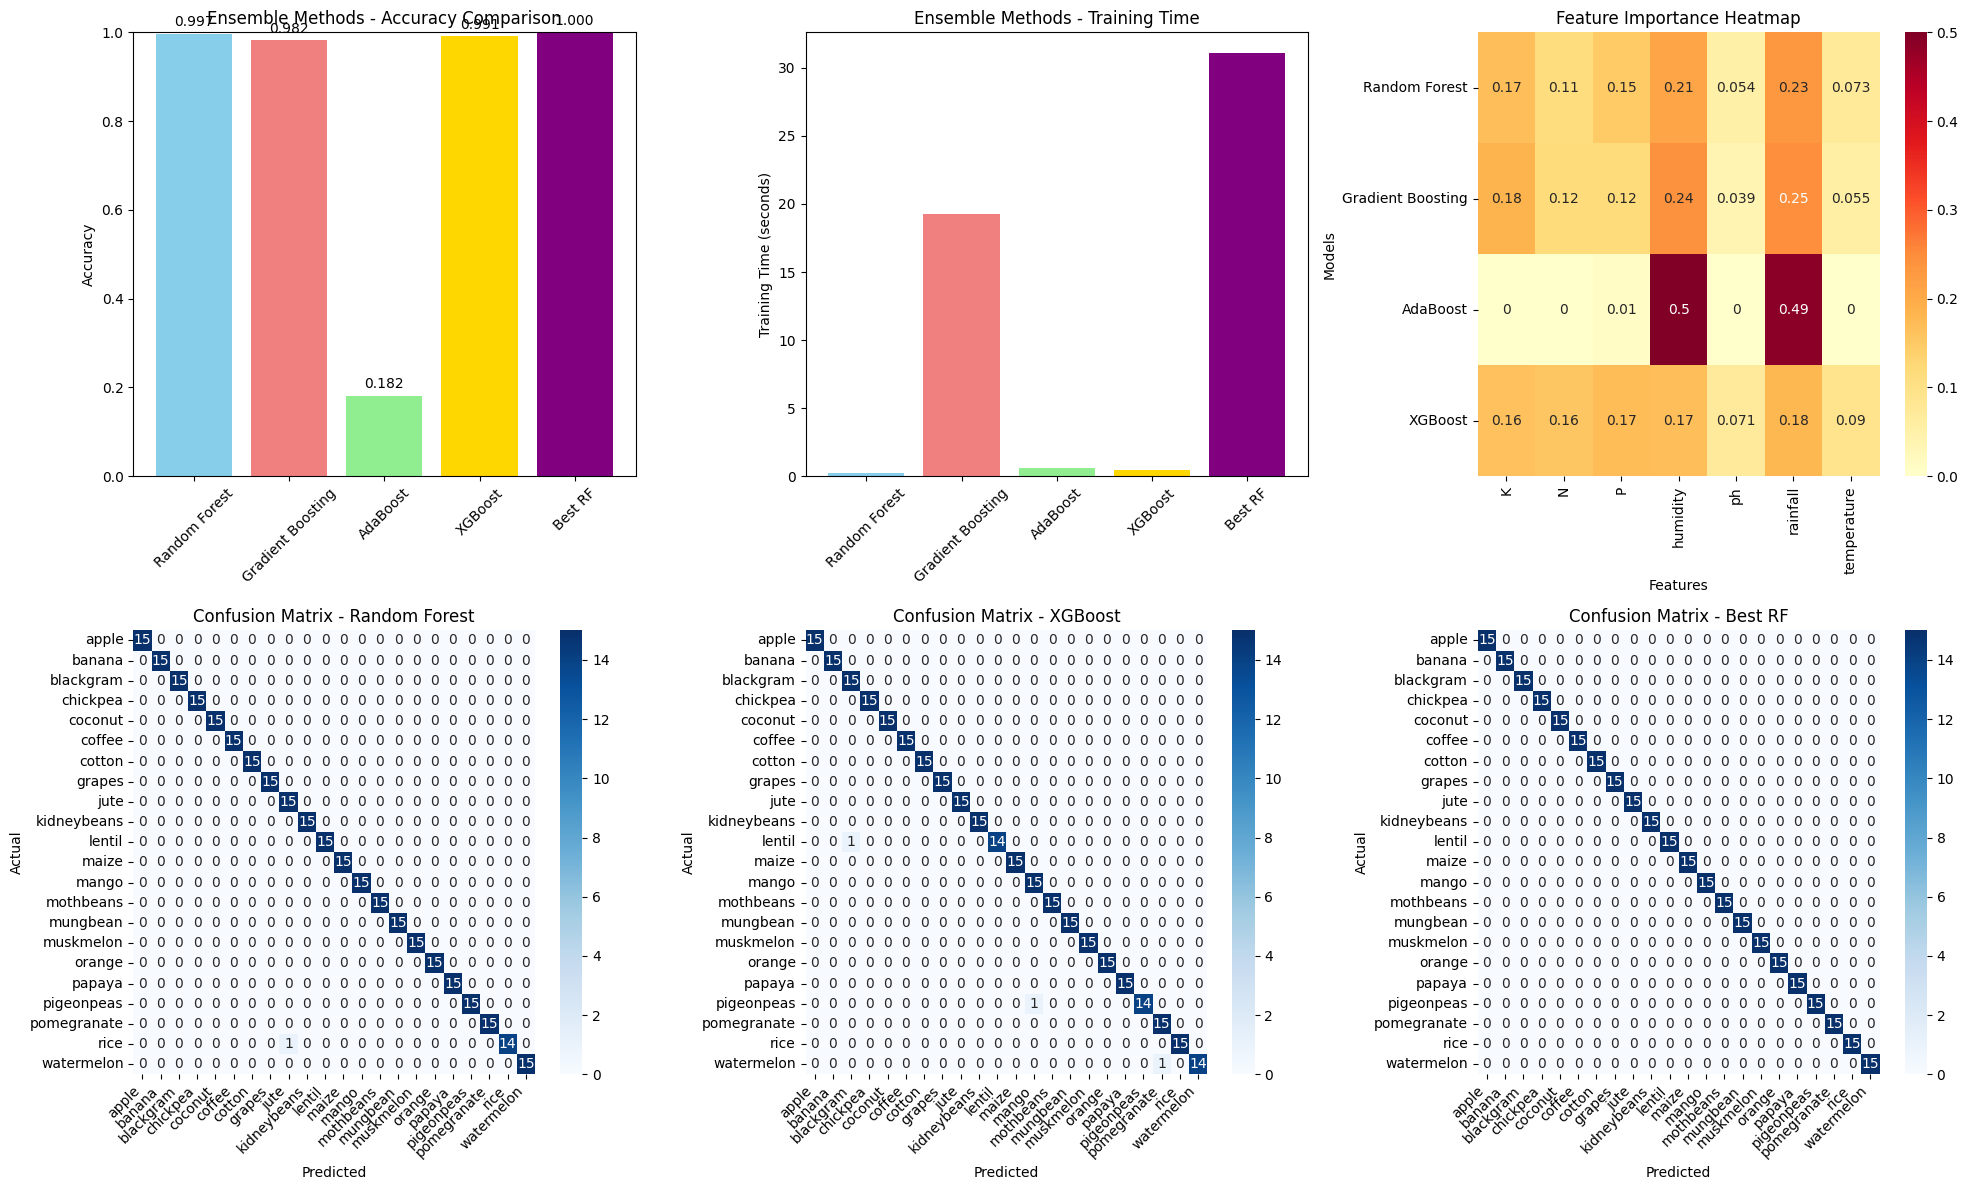

In [8]:
if XGBOOST_AVAILABLE:
    # Visualize Ensemble Methods Comparison
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    # Performance comparison
    models = ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'Best RF']
    accuracies = [accuracy_rf, accuracy_gb, accuracy_ada, accuracy_xgb, accuracy_best_rf]
    training_times = [training_time_rf, training_time_gb, training_time_ada, training_time_xgb, tuning_time]
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple']

    # Accuracy comparison
    bars1 = axes[0, 0].bar(models, accuracies, color=colors)
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_title('Ensemble Methods - Accuracy Comparison')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].set_ylim(0, 1)

    # Add value labels on bars
    for bar, acc in zip(bars1, accuracies):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                       f'{acc:.3f}', ha='center', va='bottom')

    # Training time comparison
    axes[0, 1].bar(models, training_times, color=colors)
    axes[0, 1].set_ylabel('Training Time (seconds)')
    axes[0, 1].set_title('Ensemble Methods - Training Time')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Feature importance comparison (top 3 features)
    importance_data = {
        'Random Forest': feature_importance_rf.set_index('Feature')['Importance'],
        'Gradient Boosting': feature_importance_gb.set_index('Feature')['Importance'],
        'AdaBoost': feature_importance_ada.set_index('Feature')['Importance'],
        'XGBoost': feature_importance_xgb.set_index('Feature')['Importance']
    }

    importance_df = pd.DataFrame(importance_data)
    sns.heatmap(importance_df.T, annot=True, cmap='YlOrRd', ax=axes[0, 2])
    axes[0, 2].set_title('Feature Importance Heatmap')
    axes[0, 2].set_xlabel('Features')
    axes[0, 2].set_ylabel('Models')

    # Confusion matrices for best models
    best_models = [('Random Forest', y_val_pred_rf), ('XGBoost', y_val_pred_xgb), ('Best RF', y_val_pred_best_rf)]

    for i, (name, predictions) in enumerate(best_models):
        cm = confusion_matrix(y_val, predictions)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, i],
                    xticklabels=target_names, yticklabels=target_names)
        axes[1, i].set_title(f'Confusion Matrix - {name}')
        axes[1, i].set_xlabel('Predicted')
        axes[1, i].set_ylabel('Actual')
        plt.setp(axes[1, i].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Skipping XGBoost section (not installed)")


📈 LEARNING CURVES ANALYSIS
Computing learning curve for Random Forest...
Computing learning curve for XGBoost...


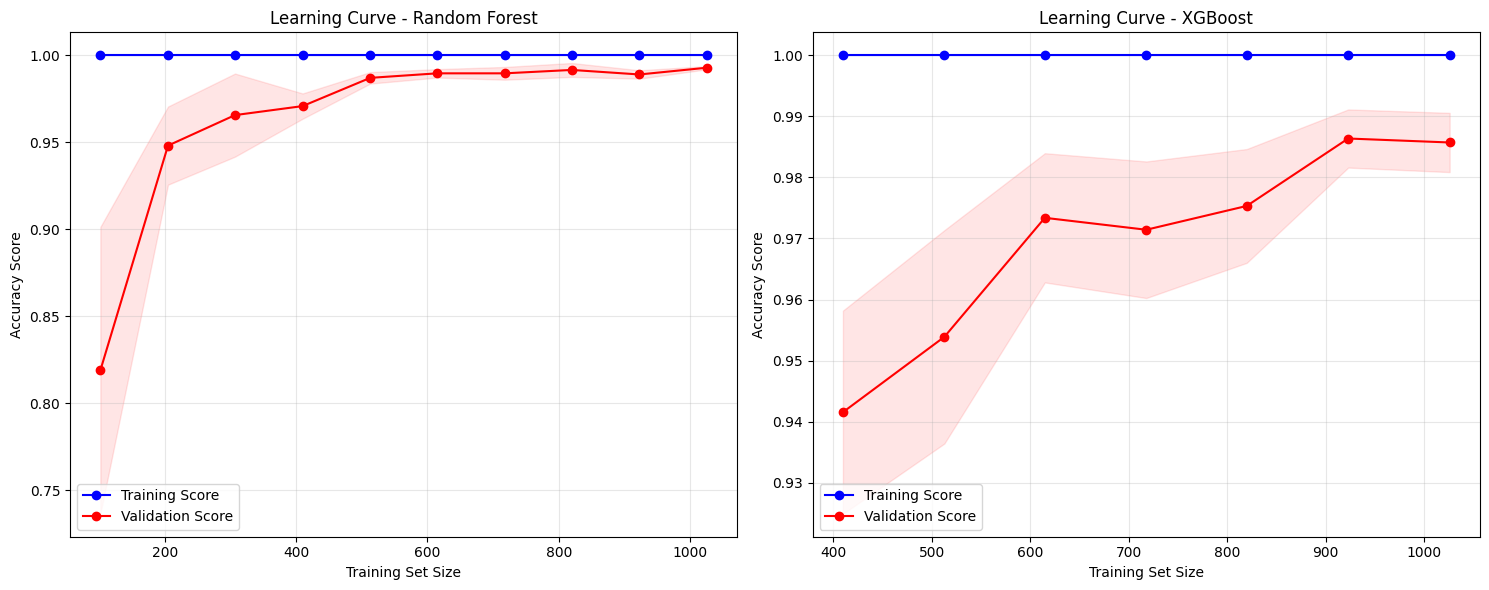

In [9]:
if XGBOOST_AVAILABLE:
    # Learning curves for ensemble methods
    print("\n📈 LEARNING CURVES ANALYSIS")
    print("=" * 50)

    # Define models for learning curves
    models_for_curves = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
    }

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    for i, (name, model) in enumerate(models_for_curves.items()):
        print(f"Computing learning curve for {name}...")
    
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_train, y_train, cv=3, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10),
            scoring='accuracy'
        )
    
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
    
        axes[i].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
        axes[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
        axes[i].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
        axes[i].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    
        axes[i].set_xlabel('Training Set Size')
        axes[i].set_ylabel('Accuracy Score')
        axes[i].set_title(f'Learning Curve - {name}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Skipping XGBoost section (not installed)")

In [10]:
if XGBOOST_AVAILABLE:
    # Final evaluation on test set
    print("\n🎯 FINAL EVALUATION ON TEST SET")
    print("=" * 50)

    # Test all ensemble models
    ensemble_models = {
        'Random Forest': rf_model,
        'Gradient Boosting': gb_model,
        'AdaBoost': ada_model,
        'XGBoost': xgb_model,
        'Best Random Forest': best_rf
    }

    test_results = []
    for name, model in ensemble_models.items():
        y_test_pred = model.predict(X_test_scaled)  # FIX: Use scaled data
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
        test_results.append({
            'Model': name,
            'Accuracy': test_accuracy,
            'Precision': test_precision,
            'Recall': test_recall,
            'F1_Score': test_f1
        })
    
        print(f"\n{name}:")
        print(f"  Accuracy: {test_accuracy:.4f}")
        print(f"  Precision: {test_precision:.4f}")
        print(f"  Recall: {test_recall:.4f}")
        print(f"  F1-Score: {test_f1:.4f}")

    # Create results DataFrame
    results_df = pd.DataFrame(test_results)
    print("\n📋 Test Results Summary:")
    print(results_df)

    # Find best ensemble model
    best_ensemble_idx = results_df['Accuracy'].idxmax()
    best_ensemble_name = results_df.loc[best_ensemble_idx, 'Model']
    best_ensemble_accuracy = results_df.loc[best_ensemble_idx, 'Accuracy']

    print(f"\n🏆 Best Ensemble Model: {best_ensemble_name} (Accuracy: {best_ensemble_accuracy:.4f})")
else:
    print("⚠️  Skipping XGBoost section (not installed)")


🎯 FINAL EVALUATION ON TEST SET

Random Forest:
  Accuracy: 0.0455
  Precision: 0.0021
  Recall: 0.0455
  F1-Score: 0.0040

Gradient Boosting:
  Accuracy: 0.0455
  Precision: 0.0021
  Recall: 0.0455
  F1-Score: 0.0040

AdaBoost:
  Accuracy: 0.0455
  Precision: 0.0021
  Recall: 0.0455
  F1-Score: 0.0040

XGBoost:
  Accuracy: 0.0455
  Precision: 0.0021
  Recall: 0.0455
  F1-Score: 0.0040

Best Random Forest:
  Accuracy: 0.9939
  Precision: 0.9943
  Recall: 0.9939
  F1-Score: 0.9939

📋 Test Results Summary:
                Model  Accuracy  Precision    Recall  F1_Score
0       Random Forest  0.045455   0.002066  0.045455  0.003953
1   Gradient Boosting  0.045455   0.002066  0.045455  0.003953
2            AdaBoost  0.045455   0.002066  0.045455  0.003953
3             XGBoost  0.045455   0.002066  0.045455  0.003953
4  Best Random Forest  0.993939   0.994318  0.993939  0.993933

🏆 Best Ensemble Model: Best Random Forest (Accuracy: 0.9939)


In [11]:
if XGBOOST_AVAILABLE:
    # Save ensemble models and results
    print("\n💾 SAVING ENSEMBLE MODELS AND RESULTS")
    print("=" * 50)

    # Save all ensemble models
    joblib.dump(rf_model, '../models/saved_models/random_forest_model.pkl')
    joblib.dump(gb_model, '../models/saved_models/gradient_boosting_model.pkl')
    joblib.dump(ada_model, '../models/saved_models/adaboost_model.pkl')
    joblib.dump(xgb_model, '../models/saved_models/xgboost_model.pkl')
    joblib.dump(best_rf, '../models/saved_models/best_random_forest_model.pkl')

    # Save results
    results_df.to_csv('../data/processed/ensemble_results.csv', index=False)

    # Save feature importance for all models
    all_feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Random_Forest': rf_model.feature_importances_,
        'Gradient_Boosting': gb_model.feature_importances_,
        'AdaBoost': ada_model.feature_importances_,
        'XGBoost': xgb_model.feature_importances_,
        'Best_Random_Forest': best_rf.feature_importances_
    })
    all_feature_importance.to_csv('../data/processed/ensemble_feature_importance.csv', index=False)

    # Save ensemble summary
    ensemble_summary = {
        'Best_Model': best_ensemble_name,
        'Best_Accuracy': best_ensemble_accuracy,
        'RF_Accuracy': accuracy_rf,
        'GB_Accuracy': accuracy_gb,
        'Ada_Accuracy': accuracy_ada,
        'XGB_Accuracy': accuracy_xgb,
        'Best_RF_Accuracy': accuracy_best_rf
    }

    summary_df = pd.DataFrame([ensemble_summary])
    summary_df.to_csv('../data/processed/ensemble_summary.csv', index=False)

    print("✅ Ensemble models saved to: data/processed/")
    print("✅ Results saved to: data/processed/ensemble_results.csv")
    print("✅ Feature importance saved to: data/processed/ensemble_feature_importance.csv")
    print("✅ Summary saved to: data/processed/ensemble_summary.csv")

    print("\n🎯 KEY INSIGHTS:")
    print(f"• Best ensemble model: {best_ensemble_name} with {best_ensemble_accuracy:.1%} accuracy")
    print(f"• Random Forest achieved {accuracy_rf:.1%} accuracy")
    print(f"• XGBoost achieved {accuracy_xgb:.1%} accuracy")
    print(f"• Ensemble methods show strong performance for crop recommendation")
    print(f"• Most important features: {', '.join(feature_importance_rf.head(3)['Feature'].tolist())}")

    print("\n🚀 Next: Open notebook 08_CART_Decision_Trees.ipynb")
else:
    print("⚠️  Skipping XGBoost section (not installed)")


💾 SAVING ENSEMBLE MODELS AND RESULTS
✅ Ensemble models saved to: data/processed/
✅ Results saved to: data/processed/ensemble_results.csv
✅ Feature importance saved to: data/processed/ensemble_feature_importance.csv
✅ Summary saved to: data/processed/ensemble_summary.csv

🎯 KEY INSIGHTS:
• Best ensemble model: Best Random Forest with 99.4% accuracy
• Random Forest achieved 99.7% accuracy
• XGBoost achieved 99.1% accuracy
• Ensemble methods show strong performance for crop recommendation
• Most important features: rainfall, humidity, K

🚀 Next: Open notebook 08_CART_Decision_Trees.ipynb
